# Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

Adapted from *Jake VanderPlas* http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

*University of Washington eScience Institute*

Uses data from [Fremont Bike Counter.](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k)

## Part 5: Creating a Python Package

We will now move the get_fremont_data() function into a Python package. This will enable us to reuse the function if we want to anaylze the same data in another Notebook.

Putting functions into packages like this is how we start to build a tool that other people can use.

First, create a sub-directory called 'jupyterworkflow' to hold the package contents. 

In that subdirectory, create a file called __ init.py __ (but omit the spaces) with one line, say, x=5.67. 

Now, if we open iPython in a Terminal and import jupyterworkflow, then jupyterworkflow.x should be available for us to run.

Next, we create a file in the jupyterworkflow directory called data.py and move the code for our get_fremont_data() function into it.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from jupyterworkflow.data import get_fremont_data

In [3]:
data = get_fremont_data()

In [4]:
data.shape

(55488, 3)

In [5]:
data.head()

,West,East,Total
Date,,,
2019-01-31 23:00:00,7.0,6.0,13.0
2019-01-31 22:00:00,13.0,16.0,29.0
2019-01-31 21:00:00,18.0,27.0,45.0
2019-01-31 20:00:00,32.0,33.0,65.0
2019-01-31 19:00:00,40.0,94.0,134.0


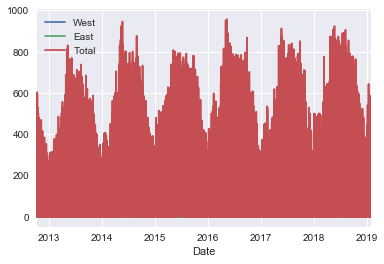

In [6]:
data.plot();

This is very busy, so let's look at weekly sums.

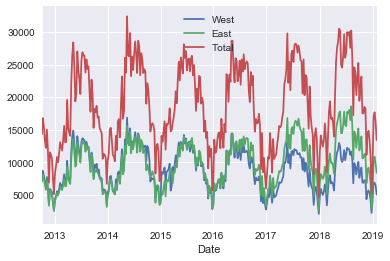

In [7]:
data.resample('W').sum().plot();

In [8]:
data.describe()

,West,East,Total
count,55479.000000,55479.000000,55479.000000
mean,52.431316,58.315272,110.746589
std,67.826311,84.737058,139.847765
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,70.000000,144.000000
max,698.000000,717.000000,957.000000


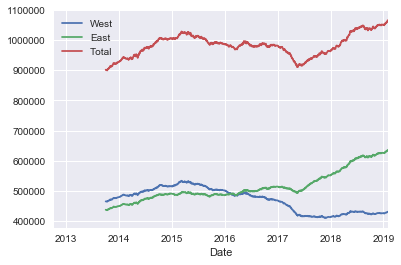

In [9]:
data.resample('D').sum().rolling(365).sum().plot();

This shows an annual trend with each point being the sum of the previous 365 days.

Adjust Y-axis to be zero-based.

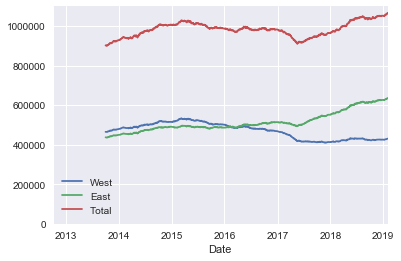

In [10]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

Now let's look at the trend within individual days.

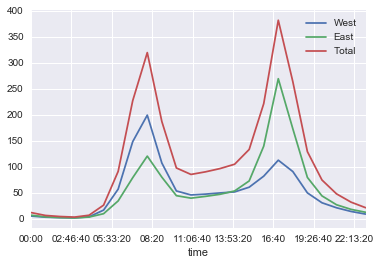

In [11]:
data.groupby(data.index.time).mean().plot();

This reveals a typical commute pattern with a westbound peak in the morning and an eastbound peak in the afternoon.

It would also be nice to see the whole dataset in this way.

In [12]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.shape

(24, 2312)

What does the first 5x5 block look like in this pivot table?

In [13]:
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


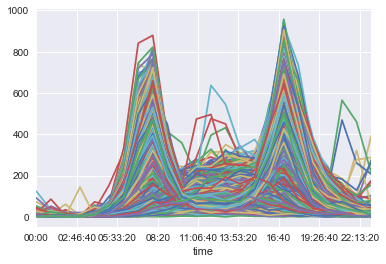

In [14]:
pivoted.plot(legend=False);

This plot has a line for each day for all of the years, so let's change the transparency of each line.

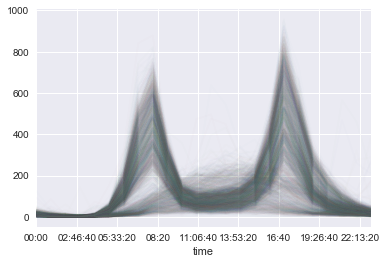

In [15]:
pivoted.plot(legend=False, alpha=0.01);

Now we see that there are days with the commute pattern and days (maybe weekends?) with more of a midday pattern.

We can examine the get_fremont_data() documentation:

In [16]:
get_fremont_data?

Signature:
get_fremont_data(
    ["filename='Fremont.csv'", "url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'", 'force_download=False'],
)
Docstring:
Download and cache the fremont data

Parameters
----------
filename : string (optional)
    location to save the data
url : string (optional)
    web location of the data
force_download : bool (optional)
    if True, force redownload of data

Returns
-------
data : pandas.DataFrame
    The fremont bridge data
File:      ~/Data Science/Python Data Analysis/Jupyter Workflow Example/JupyterWorkflow/jupyterworkflow/data.py
Type:      function


... and see the source code:

In [17]:
get_fremont_data??

Signature:
get_fremont_data(
    ["filename='Fremont.csv'", "url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'", 'force_download=False'],
)
Source:   
def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL, 
                     force_download=False):
    """Download and cache the fremont data

    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data

    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data
    """    
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns=['West', 'East']
    data['Total'] = data['West'] + data['East']
    return(data)
File:      ~/Data Science/Python Data Analysis/Jupyter Workflow Example